In [1]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
digits = datasets.load_digits() # 手写数字数据集
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
digits.target_names # 数据集所有的特征

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

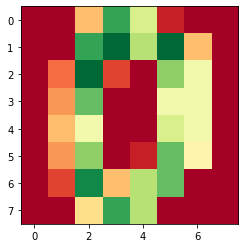

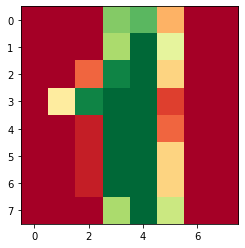

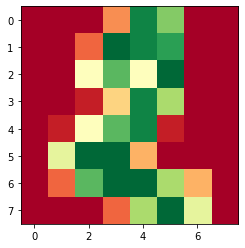

In [6]:
for i in range(3):
    some_digit = X[i].reshape(8, 8)
    plt.imshow(some_digit, cmap=matplotlib.cm.RdYlGn) # 将数组转换为图像
    plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 留出法划分数据集


In [8]:
standardScalar = preprocessing.StandardScaler() # 均值方差归一化
standardScalar.fit(X_train) # X_train的形式必须为2维矩阵

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
standardScalar.mean_ # 训练数据集的均值

array([0.00000000e+00, 2.95059151e-01, 5.15727209e+00, 1.17828810e+01,
       1.18705637e+01, 5.76478775e+00, 1.29645094e+00, 1.12734864e-01,
       3.47947112e-03, 1.91788448e+00, 1.03855254e+01, 1.19053584e+01,
       1.02700070e+01, 8.18302018e+00, 1.84133612e+00, 8.83785665e-02,
       2.78357690e-03, 2.55601949e+00, 9.88239388e+00, 7.00139179e+00,
       7.11830202e+00, 7.73764788e+00, 1.81697982e+00, 4.87125957e-02,
       1.39178845e-03, 2.45511482e+00, 9.11064718e+00, 8.83368128e+00,
       9.90118302e+00, 7.51983299e+00, 2.34237996e+00, 2.78357690e-03,
       0.00000000e+00, 2.31871955e+00, 7.66388309e+00, 9.13291580e+00,
       1.02985386e+01, 8.71537926e+00, 2.88239388e+00, 0.00000000e+00,
       1.04384134e-02, 1.59011830e+00, 6.83368128e+00, 7.33890049e+00,
       7.67432150e+00, 8.19276270e+00, 3.38135003e+00, 3.27070285e-02,
       8.35073069e-03, 6.92414753e-01, 7.43493389e+00, 9.49338900e+00,
       9.31663187e+00, 8.72651357e+00, 3.69798191e+00, 1.98329854e-01,
      

In [10]:
standardScalar.scale_ # 训练数据集的方差

array([1.        , 0.87606975, 4.70836745, 4.26262576, 4.30451244,
       5.62542804, 3.232545  , 0.90145516, 0.06970762, 3.10568993,
       5.40589249, 3.98161474, 4.8217523 , 6.08824378, 3.54804234,
       0.70379028, 0.06455708, 3.53142178, 5.6798809 , 5.84037236,
       6.17501017, 6.19010441, 3.30610301, 0.44030586, 0.03728071,
       3.15019025, 6.14085462, 5.87335904, 6.13533113, 5.84767705,
       3.72315715, 0.05268613, 1.        , 3.47533575, 6.31027128,
       6.26650156, 5.95020668, 5.8552827 , 3.51585776, 1.        ,
       0.16012222, 2.98518491, 6.51037659, 6.47052928, 6.2519354 ,
       5.70131074, 4.25631629, 0.34137424, 0.22677398, 1.72138042,
       5.63572746, 5.24561567, 5.38050636, 6.02716651, 4.92157876,
       0.90174037, 0.02637063, 0.90007132, 5.08322508, 4.39096209,
       4.96084011, 5.90143528, 4.0913014 , 1.89006537])

In [11]:
# ★★★★★当特征取值具有不同取值范围时,差值较大的特征对计算结果的影响较大,如果认为这样特征是同等重要的,则需要对特征进行归一化处理
X_train = standardScalar.transform(X_train)
X_test = standardScalar.transform(X_test) # ★★★★★测试数据集使用训练数据集的均值和方差进行归一化处理

In [12]:
'''
weights : str or callable, optional (default = ‘uniform’)
    weight function used in prediction. Possible values:
        ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of 
            a query point will have a greater influence than neighbors which are further away.
        [callable] : a user-defined function which accepts an array of distances, and returns an array of 
            the same shape containing the weights.
'''
kNN_classifier = KNeighborsClassifier(n_neighbors=6, # 临近点个数,即k值(默认n_neighbors=5) 
                                      weights='distance',
                                      p=2, # 选择何种Minkowski距离(默认p=2,即欧氏距离)
                                      n_jobs=-1)
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='distance')

In [13]:
kNN_classifier.predict(X_test) # Predict the class labels for the provided data

array([8, 9, 1, 2, 3, 5, 0, 9, 3, 1, 7, 2, 3, 4, 0, 1, 1, 7, 3, 5, 4, 7,
       3, 6, 5, 1, 4, 0, 8, 7, 0, 0, 9, 0, 2, 4, 8, 1, 5, 7, 5, 5, 8, 3,
       0, 6, 3, 4, 3, 9, 4, 7, 6, 7, 2, 8, 4, 6, 0, 9, 8, 2, 1, 3, 6, 3,
       7, 6, 2, 9, 5, 7, 7, 6, 4, 3, 2, 9, 2, 5, 9, 2, 7, 5, 4, 1, 5, 8,
       9, 9, 5, 7, 5, 5, 5, 4, 8, 0, 2, 4, 2, 5, 1, 6, 9, 7, 0, 3, 7, 1,
       3, 0, 1, 2, 7, 3, 1, 0, 8, 7, 2, 7, 9, 6, 5, 4, 6, 1, 3, 7, 0, 5,
       0, 3, 1, 2, 8, 7, 1, 1, 6, 9, 7, 1, 8, 9, 9, 4, 2, 3, 6, 2, 8, 8,
       1, 0, 0, 2, 4, 6, 3, 6, 2, 3, 4, 5, 3, 6, 8, 3, 3, 1, 2, 9, 9, 5,
       5, 7, 7, 9, 1, 3, 4, 5, 4, 5, 2, 2, 4, 1, 9, 6, 6, 9, 6, 8, 1, 2,
       4, 5, 5, 3, 3, 9, 3, 4, 3, 0, 9, 7, 2, 5, 1, 4, 1, 0, 8, 0, 8, 0,
       1, 0, 1, 9, 9, 5, 5, 0, 3, 4, 6, 5, 9, 0, 2, 6, 6, 2, 5, 6, 4, 8,
       0, 3, 5, 2, 8, 4, 2, 8, 4, 2, 0, 2, 4, 0, 6, 8, 3, 1, 4, 0, 7, 3,
       3, 8, 9, 9, 5, 3, 5, 8, 3, 5, 9, 7, 1, 9, 9, 8, 2, 7, 6, 5, 4, 9,
       2, 7, 3, 7, 7, 0, 9, 0, 3, 6, 7, 1, 3, 9, 0,

In [ ]:
# 预测结果可以输出为概率向量
kNN_classifier.predict_proba(X_test) # Return probability estimates for the test data X.

In [14]:
kNN_classifier.score(X_test, y_test) # ★★★★★使用的是进行归一化处理后的X_test

0.9694444444444444

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.85862718],
       [0.        , 0.73316191, 0.26683809, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])